# Score Prediction Using Supervised ML

Objective: Predict percentage score of student based on number of study hours.

Author: Divya Shah. 

GRIP Intern Batch April 2024

In [1]:
# importing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd

Step1 : Understanding the Data

In [3]:
#Read the dataset - Here I have converted the text data into excel format
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
st_data = pd.read_csv(url)

In [4]:
st_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's inspect the asects of our dataframe.

In [5]:
st_data.shape

(25, 2)

In [6]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
st_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2: Visualizing the data

In [8]:
# Importing Necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns

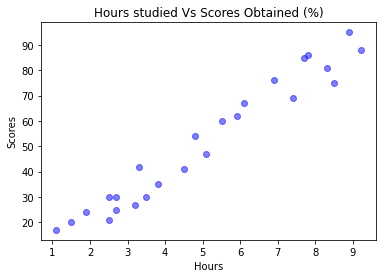

In [9]:
plt.scatter(st_data['Hours'], st_data['Scores'], color = 'blue', alpha = 0.5)
plt.title("Hours studied Vs Scores Obtained (%)")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

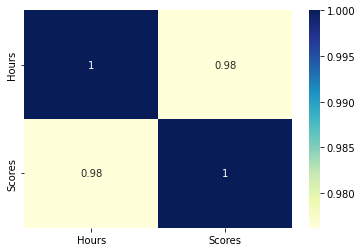

In [10]:
sns.heatmap(st_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

It is clear from both plots that no of hours dedeicated for studies are directly proportional to scores obtained by a student. 

## Step 3: Performing Simple Linear Regression

We will first build model using sklearn

We first assign feature variable, hours in this case to X and response variable scores to Y.

In [11]:
X = st_data.iloc[:, :-1].values
y = st_data.iloc[:,1].values 

**Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)

**Building a Linear Model**

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

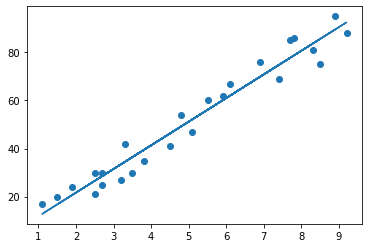

In [14]:
#Plotting the linear regression line
line = lr.coef_*X + lr.intercept_

#plotting for test dataset
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

## Step 4: Predictions on Test Set

In [15]:
print(X_test)
y_pred = lr.predict(X_test)

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]]


**Comparining the predicted scores with actual scores**

In [16]:
compare_scores = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores':y_pred})

In [17]:
compare_scores

,Actual Scores,Predicted Scores
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


Here, it is observed that there is not much difference between predicted and actual values.

**Visualizing the fit on test set**

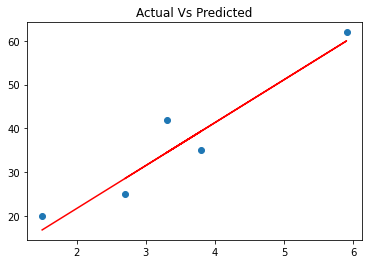

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.title('Actual Vs Predicted')
plt.show()

# Step 5: Evaluation of Model

**Let's Check RMSE**

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

4.543287018366107

In [21]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9050356232459791

The R-sqaured value is 0.905 which means that 90.5% of the variance in scores obtained is explained by hours dedicated for studies. This is a very good R square value.

**Q. What will be the predicted score if a student studies for 9.25 Hrs a day?**

In [25]:
hours = [9.25]
answer = lr.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.967
